In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
sns.set(style="whitegrid")

In [36]:
labels = pd.read_csv("../train_labels.csv")
values = pd.read_csv("../train_values.csv")

In [37]:
values.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [38]:
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [39]:
values_joined = values[['building_id', 'age']].merge(labels, how='inner')
values_joined.set_index("building_id", inplace=True)
values_joined.head()

,age,damage_grade
building_id,,
802906,30,3
28830,10,2
94947,10,3
590882,10,2
201944,30,3


In [40]:
values_joined['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
175        5
135        5
190        3
145        3
195        2
165        2
185        1
155        1
Name: age, dtype: int64

In [41]:
values_less_than_50 = values_joined[values_joined['age'] <= 50]
values_less_than_50

,age,damage_grade
building_id,,
802906,30,3
28830,10,2
94947,10,3
590882,10,2
201944,30,3
...,...,...
159555,0,2
827012,20,3
669485,0,3


In [67]:
less_than_50_grouped = values_less_than_50.groupby("damage_grade").agg({'age': 'count'})
less_than_50_grouped

,age
damage_grade,
1,24691
2,137300
3,80466


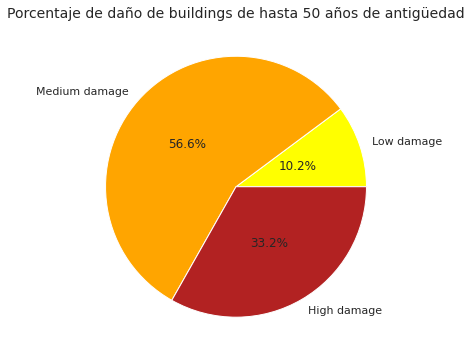

In [68]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=less_than_50_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de hasta 50 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

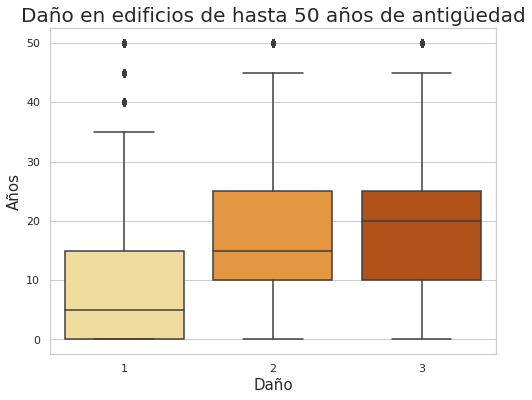

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_less_than_50, palette="YlOrBr")
plt.title("Daño en edificios de hasta 50 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

In [10]:
values_greater_than_50 = values_joined[(values_joined['age'] > 50) & (values_joined['age'] <= 100)]
values_greater_than_50

,building_id,age,damage_grade
15,563431,55,2
24,519606,80,2
29,529366,60,3
42,833827,70,3
66,799678,60,2
...,...,...,...
260541,798100,100,1
260543,814871,55,3
260551,603724,70,3
260596,688636,55,2


In [94]:
greater_than_50_grouped = values_greater_than_50.groupby("damage_grade").agg({'age': 'count'})
greater_than_50_grouped

,age
damage_grade,
1,244
2,9682
3,6094


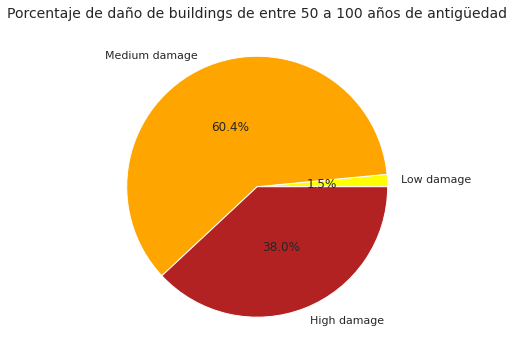

In [96]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_50_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 50 a 100 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

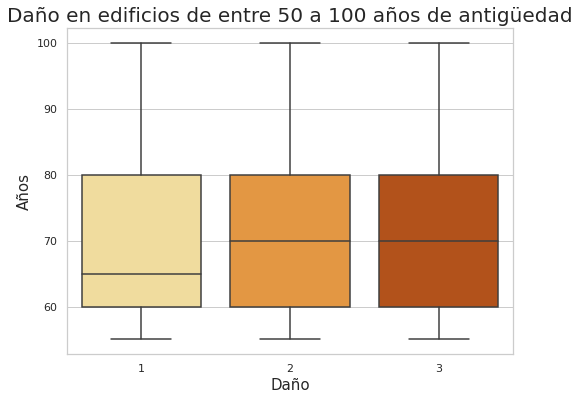

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_greater_than_50, palette="YlOrBr")
plt.title("Daño en edificios de entre 50 a 100 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

In [12]:
values_greater_than_100 = values_joined[(values_joined['age'] > 100) & (values_joined['age'] <= 150)]
values_greater_than_100

,building_id,age,damage_grade
419,370360,105,2
926,117310,120,2
1677,783077,110,3
1924,249406,120,2
2131,489146,120,2
...,...,...,...
258818,127207,120,2
259436,821111,105,2
259510,218097,120,3
259652,542312,120,3


In [104]:
greater_than_100_grouped = values_greater_than_100.groupby("damage_grade").agg({'age': 'count'})
greater_than_100_grouped

,age
damage_grade,
1,7
2,369
3,219


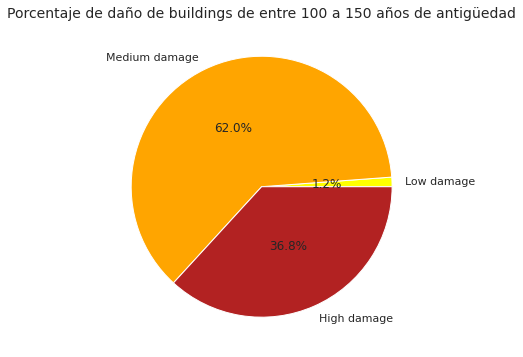

In [105]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_100_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 100 a 150 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

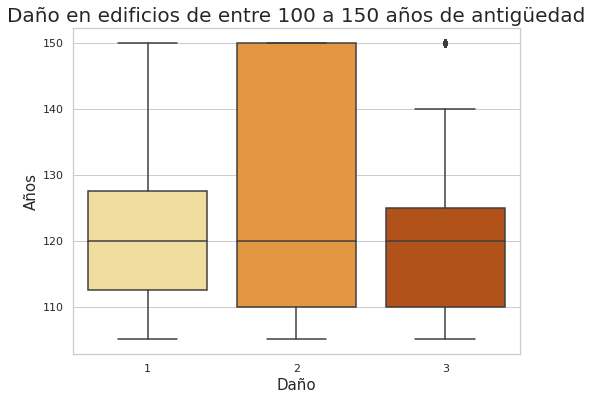

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_greater_than_100, palette="YlOrBr")
plt.title("Daño en edificios de entre 100 a 150 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

Los box plot para el rango de 150 a 200 años y 995 años no son demostrativos.

In [108]:
values_greater_than_150 = values_joined[(values_joined['age'] > 150) & (values_joined['age'] <= 200)]
values_greater_than_150

,age,damage_grade
building_id,,
737045,190,3
486774,200,3
604553,200,2
7408,200,3
39029,200,2
...,...,...
171813,180,2
922476,170,2
1005629,200,3


In [109]:
greater_than_150_grouped = values_greater_than_150.groupby("damage_grade").agg({'age': 'count'})
greater_than_150_grouped

,age
damage_grade,
1,3
2,86
3,50


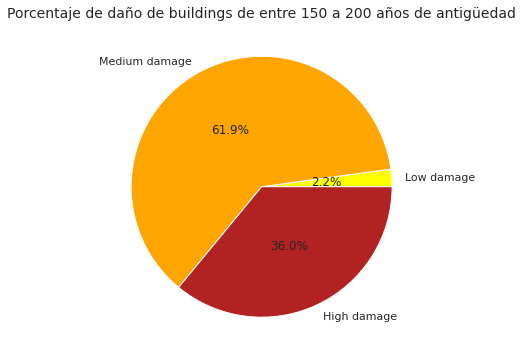

In [110]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_150_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 150 a 200 años de antigüedad", fontsize=14);

In [112]:
values_of_age_995 = values_joined[(values_joined['age'] == 995)]
values_of_age_995

,age,damage_grade
building_id,,
435557,995,2
597626,995,1
7560,995,3
797271,995,1
857371,995,3
...,...,...
160373,995,2
9269,995,2
34321,995,3


In [114]:
age_995_grouped = values_of_age_995.groupby("damage_grade").agg({'age': 'count'})
age_995_grouped

,age
damage_grade,
1,179
2,822
3,389


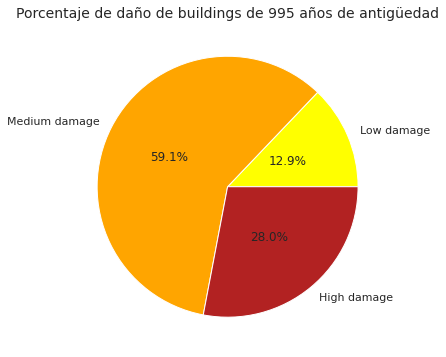

In [115]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=age_995_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de 995 años de antigüedad", fontsize=14);